<a href="https://colab.research.google.com/github/Mukul1Panwar/machine_learning_models/blob/main/loan_approval_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("/content/sample_data/Copy of loan.csv")

In [6]:
df = df.drop('Loan_ID',axis=1)
df = df.drop('Property_Area',axis=1)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 52.9+ KB


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mean(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [11]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [12]:
df.shape

(614, 11)

number of people who take loan as group by gender : 
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Gender'>

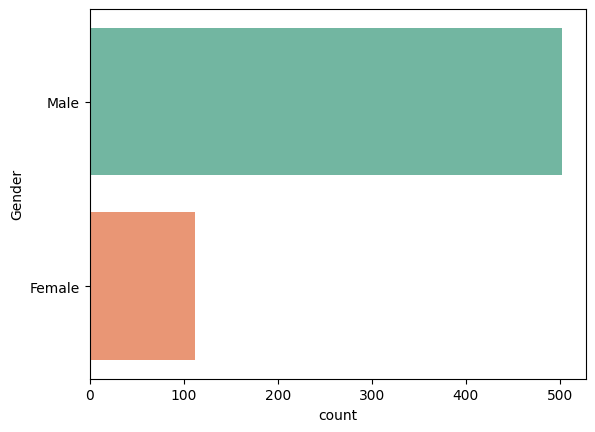

In [13]:
print("number of people who take loan as group by gender : ")
print(df['Gender'].value_counts())
sns.countplot(df['Gender'],palette='Set2')

number of people who take loan as group by martial status : 
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Married'>

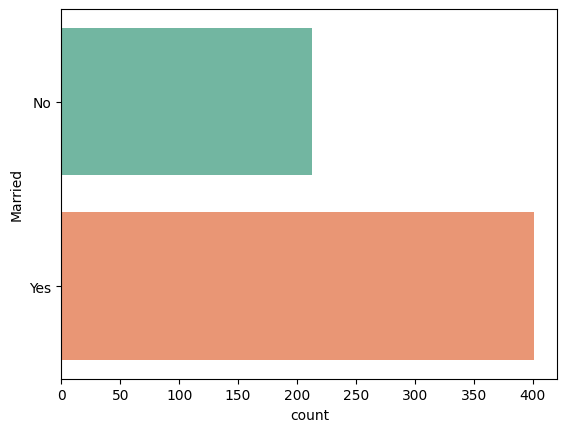

In [14]:
print('number of people who take loan as group by martial status : ')
print(df['Married'].value_counts())
sns.countplot(df['Married'],palette='Set2')

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = encoder.fit_transform(df[col])

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
x = df.iloc[:,:10]
y=df.iloc[:,10]

In [19]:
Xtest,Xtrain,Ytest,Ytrain = train_test_split(
    x,y,test_size=0.3)

In [20]:
Xtest.shape,Ytest.shape,Xtrain.shape,Ytrain.shape

((429, 10), (429,), (185, 10), (185,))

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(Xtrain,Ytrain)

LogisticRegression()

In [24]:
Ypred = lr.predict(Xtest)

In [25]:
print('accuracy score of training :',accuracy_score(Ytrain,lr.predict(Xtrain)))


accuracy score of training : 0.8378378378378378


In [26]:
print("accuracy score of testing : ",accuracy_score(Ytest,Ypred))

accuracy score of testing :  0.7715617715617715


In [27]:
input_data = (1,0, 0, 1, 0, 5849,0,0, 360, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = lr.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("loan not approved")
else:
  print("loan approved")

[1]
loan approved


In [28]:
import pickle

In [29]:
file_name = 'Loan_model2.sav'
pickle.dump(lr,open(file_name,'wb'))

In [30]:
loaded_model2 = pickle.load(open('Loan_model2.sav','rb'))

In [31]:
input_data = (1,0, 0, 1, 0, 5849,0,0, 360, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = loaded_model2.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("loan not approved")
else:
  print("loan approved")

[1]
loan approved
